In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
datasets = sns.get_dataset_names()
datasets

#Carica nella variabile datasets un nuovo dataset sns

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [8]:
num = 2
data = sns.load_dataset(datasets[num])
print(f'Dataset : {datasets[num]}')
data.head(10


Dataset : attention


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0
6,6,7,divided,1,5.0
7,7,8,divided,1,5.0
8,8,9,divided,1,2.0
9,9,10,divided,1,6.0


In [9]:
def show_dataset(num):
  data = sns.load_dataset(datasets[num])
  print(f'Dataset: {datasets[num]}, shape: {data.shape}')
  return data.head(10)
  
  #Definisce metodo "show_dataset". Carica in data il dataset con il parametro (inserito poi come possiamo vedere sotto) num 
  #che poi restituisce in nome del dataset e shape. Infine ritorna i primi 10 dati del dataset.

In [11]:
show_dataset(5)
#esegue il metodo sopra, richiamando il dataset num 5

Dataset: diamonds, shape: (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [12]:
data = sns.load_dataset(datasets[5])
#Assegna a data il dataset

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.columns
#Ci restituisce i nomi di tutte le colonne del dataset

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
data['cut'].unique()
#Ci restituisce i valore unici assegnati alla colonna "Cut"

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

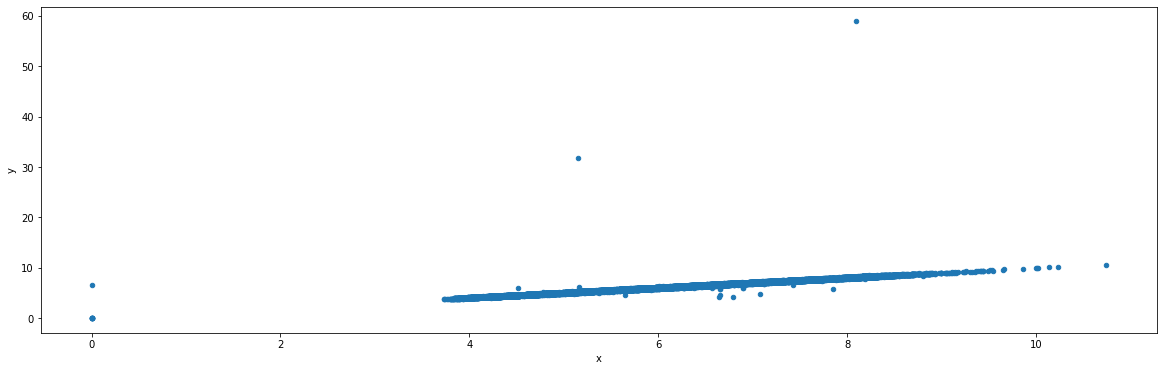

In [14]:
data.plot(kind='scatter', x='x', y='y',figsize=(20,6))
#Crea il grafico ti tipo scatter sull'asse x-y andando ad impostarne la dimensione tramite il figsize

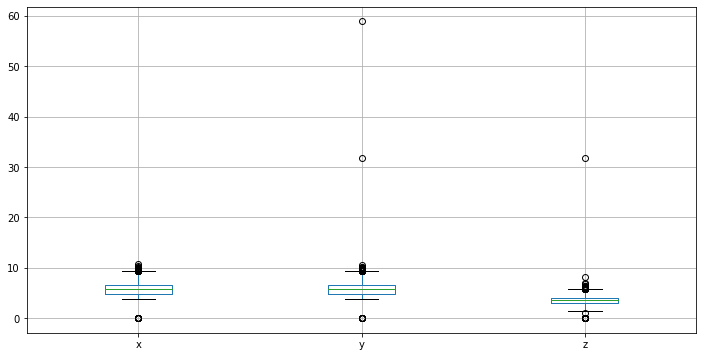

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
data[['x', 'y', 'z']].boxplot(ax=ax)
#Non ho sentito

In [ ]:
data3 = data.loc[(data['y'] < 20) & (data ['x'] > 2)]
#Va a caricare in una variabile data3 i valori filtrati del dataset data

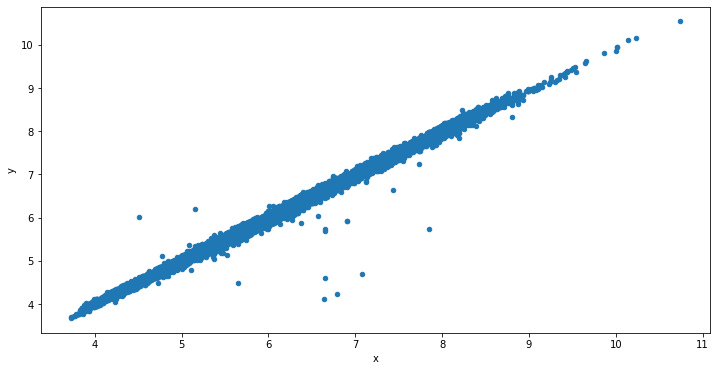

In [ ]:
data3.plot(kind='scatter', x='x', y='y',figsize=(12,6))
#Va a creare un grafico di data3 come sopra

In [ ]:
data.corr()

#correlazione lineare (1 completa correlazione, -1 correlazione inversa)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


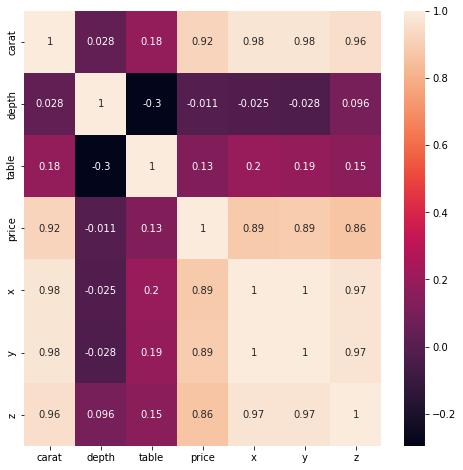

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data3.corr(), annot = True)
plt.show()

#Correlazione lineare ma non vista in una tabella con i dati ma in un modo più grafico e strutturato

In [ ]:
data[data.isna().any(axis=1)]

#Permette di vedere i dati mancanti restituendo tutti i dati mancanti (questo dataset è completo quindi response vuota)

,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
data['price'].loc[data.sample(frac=0.1).index] = np.nan

#Andiamo a creare dei null. Andiamo a prendere la colonna price e andiamo a sostituire un 10% dei dati il valore con null

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data[data.isna().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,NaN,3.95,3.98,2.43
6,0.24,Very Good,I,VVS1,62.3,57.0,NaN,3.95,3.98,2.47
12,0.22,Premium,F,SI1,60.4,61.0,NaN,3.88,3.84,2.33
17,0.30,Good,J,SI1,63.4,54.0,NaN,4.23,4.29,2.70
20,0.30,Good,I,SI2,63.3,56.0,NaN,4.26,4.30,2.71
...,...,...,...,...,...,...,...,...,...,...
53865,0.70,Very Good,F,VS2,61.7,60.0,NaN,5.63,5.65,3.48
53882,0.71,Fair,D,VS1,65.4,59.0,NaN,5.62,5.58,3.66
53885,0.75,Very Good,I,VVS2,62.0,59.0,NaN,5.81,5.83,3.61
53900,0.73,Ideal,H,VS2,62.5,58.0,NaN,5.71,5.75,3.58


In [ ]:
data['price'].mean()

#Sostituiamo i valori nan con calori calcolati. In questo caso andiamo a calcolare la media 

3935.439335887612

In [ ]:
data['price'].median()
#In questo caso andiamo a calcolare la mediana della colonna

2410.0

In [ ]:
data['price'].min(), data['price'].mean()
#Stanpa il valore minimo e il valore mediana della colonna price

(326.0, 3935.439335887612)

In [ ]:
data.loc[data.isna().any(axis=1), 'price'] = data['price'].mean()

#Sostituisce tutti i valori nan nella colonna price con la media delle colonne price che hanno un valore

In [16]:
data[data.isna().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
data.groupby(['cut']).agg({'price' : 'min'})

#Crea un raggruppamento di tutti i tipi diversi di 'cut' esistenti e prendo il valore minimo della colonna prezzo relativo ai tipi di 'cut'

,price
cut,
Ideal,340.0
Premium,326.0
Very Good,336.0
Good,327.0
Fair,337.0


In [ ]:
data.groupby(['cut']).agg({'price' : ['min', 'max'], 'carat' : 'mean'})

#Come prima, ma prende il valore massimo oltre il minimo e anche il carat

price              carat
             min      max      mean
cut                                
Ideal      340.0  18806.0  0.702837
Premium    326.0  18823.0  0.891955
Very Good  336.0  18818.0  0.806381
Good       327.0  18788.0  0.849185
Fair       337.0  18574.0  1.046137

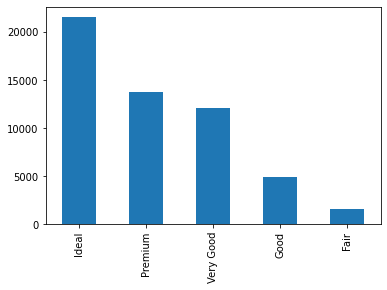

In [ ]:
data['cut'].value_counts().plot(kind='bar')

#Grafico che mostra quanti sono i dati nel dataset suddivisi nelle categorie di cut. Ex Abbiamo 20k+ di dati che nellla colonna cut hanno il valore ideal

Pratica:
- Caricare dataset da seaborn
- Usare haed(), unique, value_counts(), dytypes, columns
-usare mean(), median(9, min, max, describe
- costruire grafici a barre e dispersione